# 使用late_count_inLoan / Loan_count

In [3]:
import pandas as pd
main = pd.read_csv('/Users/hazel/Documents/credit_project_data/final_main.csv',index_col=0)
main

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,...,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_block of flats,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,late_count_inLoan / Loan_count
0,100002,0,202500.0,1,-9461,-637,-3648.0,-2120,1,0,...,0,1,0,0,0,0,0,1,0,0.0
1,100003,0,270000.0,3,-16765,-1188,-1186.0,-291,1,0,...,0,1,1,0,0,0,0,0,0,0.0
2,100004,0,67500.0,1,-19046,-225,-4260.0,-2531,1,1,...,0,0,0,0,0,0,0,0,0,0.0
3,100006,0,135000.0,1,-19005,-3039,-9833.0,-2437,1,0,...,0,0,0,0,0,0,0,0,0,0.0
4,100007,0,121500.0,1,-19932,-3038,-4311.0,-3458,1,0,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340360,456221,0,121500.0,1,-19970,-5169,-9094.0,-3399,1,1,...,0,0,0,0,0,0,0,0,0,0.0
340361,456222,2,157500.0,1,-11186,-1149,-3015.0,-3003,1,0,...,0,0,0,0,0,0,0,0,0,1.0
340362,456223,1,202500.0,1,-15922,-3037,-2681.0,-1504,1,0,...,0,1,0,0,0,0,0,1,0,0.0
340363,456224,0,225000.0,3,-13968,-2731,-1461.0,-1364,1,1,...,0,1,0,0,0,0,1,0,0,1.0


In [8]:
def outlier_removal(df, variable):
    upper_limit = df[variable].mean() + 3 * df[variable].std()
    lower_limit = df[variable].mean() - 3 * df[variable].std()
    return upper_limit, lower_limit
upper_limit, lower_limit = outlier_removal(new_data, 'AMT_INCOME_TOTAL')
print("Upper limit: ", upper_limit)
print("Lower Limit: ",lower_limit)
new_data = new_data[(new_data['AMT_INCOME_TOTAL'] > lower_limit) & (new_data['AMT_INCOME_TOTAL'] < upper_limit)]

Upper limit:  844795.7787818906
Lower Limit:  -507425.5416396756


In [9]:
new_data

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,...,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_block of flats,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,late_count_inLoan / Loan_count
0,100001,0,135000.0,3,-19241,-2329,-5170.0,-812,1,0,...,0,1,0,0,0,0,0,1,0,1.0
1,100002,0,202500.0,1,-9461,-637,-3648.0,-2120,1,0,...,0,1,0,0,0,0,0,1,0,0.0
2,100003,0,270000.0,3,-16765,-1188,-1186.0,-291,1,0,...,0,1,1,0,0,0,0,0,0,0.0
3,100004,0,67500.0,1,-19046,-225,-4260.0,-2531,1,1,...,0,0,0,0,0,0,0,0,0,0.0
4,100005,0,99000.0,1,-18064,-4469,-9118.0,-1623,1,0,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340360,448526,0,271651.5,3,-8772,-422,-3454.0,-1428,1,1,...,0,0,0,0,0,0,0,0,0,0.0
340361,449328,0,103500.0,1,-16265,-674,-29.0,-4400,1,1,...,0,0,0,0,0,0,0,0,0,0.0
340362,451328,0,108000.0,3,-9335,-662,-3801.0,-1981,1,0,...,0,0,0,0,0,0,0,0,0,0.0
340363,451362,2,337500.0,3,-14116,-1936,-8242.0,-539,1,0,...,1,1,0,0,0,0,0,1,0,0.0


In [14]:
# ref_feature_selection
group2_feature = main[['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_YEAR','AMT_CREDIT', 'AMT_ANNUITY']]
group2_feature

,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT,AMT_ANNUITY
0,202500.0,-9461,-637,-3648.0,-2120,1.0,10,2.0,-1134.0,1.0,406597.5,24700.5
1,270000.0,-16765,-1188,-1186.0,-291,2.0,11,1.0,-828.0,0.0,1293502.5,35698.5
2,67500.0,-19046,-225,-4260.0,-2531,1.0,9,0.0,-815.0,0.0,135000.0,6750.0
3,135000.0,-19005,-3039,-9833.0,-2437,2.0,17,2.0,-617.0,1.0,312682.5,29686.5
4,121500.0,-19932,-3038,-4311.0,-3458,1.0,11,0.0,-1106.0,0.0,513000.0,21865.5
...,...,...,...,...,...,...,...,...,...,...,...,...
340360,121500.0,-19970,-5169,-9094.0,-3399,1.0,16,1.0,-684.0,1.0,412560.0,17473.5
340361,157500.0,-11186,-1149,-3015.0,-3003,4.0,11,2.0,0.0,1.0,622413.0,31909.5
340362,202500.0,-15922,-3037,-2681.0,-1504,3.0,12,0.0,-838.0,1.0,315000.0,33205.5
340363,225000.0,-13968,-2731,-1461.0,-1364,2.0,10,0.0,-2308.0,2.0,450000.0,25128.0


In [11]:
# ref_feature_selection_random_forest
group3_feature = main[['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_EDUCATION_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','FLAG_PHONE', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START','OBS_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR','CODE_GENDER_F', 'FLAG_OWN_CAR_N', 'NAME_INCOME_TYPE_Working','WEEKDAY_APPR_PROCESS_START_TUESDAY', 'HOUSETYPE_MODE_block of flats','AMT_CREDIT', 'AMT_ANNUITY']]
group3_feature

,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_PHONE,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,...,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER_F,FLAG_OWN_CAR_N,NAME_INCOME_TYPE_Working,WEEKDAY_APPR_PROCESS_START_TUESDAY,HOUSETYPE_MODE_block of flats,AMT_CREDIT,AMT_ANNUITY
0,0,202500.0,1,-9461,-637,-3648.0,-2120,1,1.0,10,...,-1134.0,0.0,1.0,0,1,1,0,1,406597.5,24700.5
1,0,270000.0,3,-16765,-1188,-1186.0,-291,1,2.0,11,...,-828.0,0.0,0.0,1,1,0,0,1,1293502.5,35698.5
2,0,67500.0,1,-19046,-225,-4260.0,-2531,1,1.0,9,...,-815.0,0.0,0.0,0,0,1,0,0,135000.0,6750.0
3,0,135000.0,1,-19005,-3039,-9833.0,-2437,0,2.0,17,...,-617.0,0.0,1.0,1,1,1,0,0,312682.5,29686.5
4,0,121500.0,1,-19932,-3038,-4311.0,-3458,0,1.0,11,...,-1106.0,0.0,0.0,0,1,1,0,0,513000.0,21865.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340360,0,121500.0,1,-19970,-5169,-9094.0,-3399,1,1.0,16,...,-684.0,0.0,1.0,1,1,1,0,0,412560.0,17473.5
340361,2,157500.0,1,-11186,-1149,-3015.0,-3003,0,4.0,11,...,0.0,0.0,1.0,1,1,0,0,0,622413.0,31909.5
340362,1,202500.0,1,-15922,-3037,-2681.0,-1504,1,3.0,12,...,-838.0,3.0,1.0,1,0,0,0,1,315000.0,33205.5
340363,0,225000.0,3,-13968,-2731,-1461.0,-1364,1,2.0,10,...,-2308.0,0.0,2.0,0,1,0,0,1,450000.0,25128.0


In [5]:
# ref_feature_selection_random_forest
group4_feature = main[['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'HOUR_APPR_PROCESS_START',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_CREDIT', 'AMT_ANNUITY']]
group4_feature

,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT,AMT_ANNUITY
0,202500.0,-9461,-637,-3648.0,-2120,10,-1134.0,406597.5,24700.5
1,270000.0,-16765,-1188,-1186.0,-291,11,-828.0,1293502.5,35698.5
2,67500.0,-19046,-225,-4260.0,-2531,9,-815.0,135000.0,6750.0
3,135000.0,-19005,-3039,-9833.0,-2437,17,-617.0,312682.5,29686.5
4,121500.0,-19932,-3038,-4311.0,-3458,11,-1106.0,513000.0,21865.5
...,...,...,...,...,...,...,...,...,...
340360,121500.0,-19970,-5169,-9094.0,-3399,16,-684.0,412560.0,17473.5
340361,157500.0,-11186,-1149,-3015.0,-3003,11,0.0,622413.0,31909.5
340362,202500.0,-15922,-3037,-2681.0,-1504,12,-838.0,315000.0,33205.5
340363,225000.0,-13968,-2731,-1461.0,-1364,10,-2308.0,450000.0,25128.0


# 有使用SMOTE的方式

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE


X = group2_feature
y = new_data[['late_count_inLoan / Loan_count']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# SMOTE方法
X_res, y_res = SMOTE(random_state=42).fit_resample(X_train,y_train)


scaler = preprocessing.StandardScaler().fit(X_res)
X_res = scaler.transform(X_res)

model = RandomForestClassifier(max_depth=6, n_estimators=100)
model.fit(X_res, y_res)

X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
num_correct_samples = accuracy_score(y_test, y_pred, normalize=False)
con_matrix = confusion_matrix(y_test, y_pred)
f1_score = f1_score(y_test, y_pred, average=None)

print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))
print('con_matrix: {}'.format(con_matrix))
print('f1_score: {}'.format(f1_score))

/var/folders/dp/hcv7h_qn59b6dcz6l8v_w1z80000gn/T/ipykernel_5435/1203866543.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_res, y_res)


number of correct sample: 42380
accuracy: 0.62256695018583
con_matrix: [[16550 12213]
 [13480 25830]]
f1_score: [0.56299219 0.6678474 ]


# 無使用SMOTE

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

X = group3_feature
y = main[['late_count_inLoan / Loan_count']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

model = RandomForestClassifier(max_depth=6, n_estimators=10)
model.fit(X_train, y_train)

X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
num_correct_samples = accuracy_score(y_test, y_pred, normalize=False)
con_matrix = confusion_matrix(y_test, y_pred)
f1_score = f1_score(y_test, y_pred, average=None)
cross_val_score = cross_val_score(model,X,y,cv=10,scoring='accuracy')

print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))
print('con_matrix: {}'.format(con_matrix))
print('f1_score: {}'.format(f1_score))
print('cross_val_score: {}',cross_val_score)
print('cross_val_score_mean: {}',cross_val_score.mean())
print('訓練集{}'.format(model.score(X_train, y_train)))
print('測試集{}'.format(model.score(X_test,y_test)))

/var/folders/dp/hcv7h_qn59b6dcz6l8v_w1z80000gn/T/ipykernel_15826/2723320931.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
/Users/hazel/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hazel/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hazel/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A colu

number of correct sample: 42797
accuracy: 0.6286927269255065
con_matrix: [[ 8809 20149]
 [ 5127 33988]]
f1_score: [0.41073344 0.72894951]
cross_val_score: {} [0.63075477 0.62861004 0.63657197 0.63504422 0.6323119  0.63497473
 0.62604301 0.63083206 0.62786461 0.62542602]
cross_val_score_mean: {} 0.6308433326686826
訓練集0.6324937934276439
測試集0.6286927269255065


# 去除outliners

In [14]:
no_outliner = pd.read_csv('/Users/hazel/Documents/credit_project_data/Jen-Chao Huang/getridoff_outliner.csv',index_col=0)
no_outliner

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,...,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_block of flats,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,late_count_inLoan / Loan_count
0,100001,0,135000.0,3,-19241,-2329,-5170.0,-812,1,0,...,0,1,0,0,0,0,0,1,0,1.0
1,100002,0,202500.0,1,-9461,-637,-3648.0,-2120,1,0,...,0,1,0,0,0,0,0,1,0,0.0
2,100003,0,270000.0,3,-16765,-1188,-1186.0,-291,1,0,...,0,1,1,0,0,0,0,0,0,0.0
3,100004,0,67500.0,1,-19046,-225,-4260.0,-2531,1,1,...,0,0,0,0,0,0,0,0,0,0.0
4,100005,0,99000.0,1,-18064,-4469,-9118.0,-1623,1,0,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340360,448526,0,271651.5,3,-8772,-422,-3454.0,-1428,1,1,...,0,0,0,0,0,0,0,0,0,0.0
340361,449328,0,103500.0,1,-16265,-674,-29.0,-4400,1,1,...,0,0,0,0,0,0,0,0,0,0.0
340362,451328,0,108000.0,3,-9335,-662,-3801.0,-1981,1,0,...,0,0,0,0,0,0,0,0,0,0.0
340363,451362,2,337500.0,3,-14116,-1936,-8242.0,-539,1,0,...,1,1,0,0,0,0,0,1,0,0.0


In [15]:
# ref_feature_selection
group2_feature = no_outliner[['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_YEAR']]
group2_feature

,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR
0,135000.0,-19241,-2329,-5170.0,-812,2.0,18,0.0,-1740.0,0.0
1,202500.0,-9461,-637,-3648.0,-2120,1.0,10,2.0,-1134.0,1.0
2,270000.0,-16765,-1188,-1186.0,-291,2.0,11,1.0,-828.0,0.0
3,67500.0,-19046,-225,-4260.0,-2531,1.0,9,0.0,-815.0,0.0
4,99000.0,-18064,-4469,-9118.0,-1623,2.0,9,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...
340360,271651.5,-8772,-422,-3454.0,-1428,2.0,14,6.0,0.0,1.0
340361,103500.0,-16265,-674,-29.0,-4400,2.0,17,0.0,-261.0,1.0
340362,108000.0,-9335,-662,-3801.0,-1981,2.0,14,1.0,-408.0,1.0
340363,337500.0,-14116,-1936,-8242.0,-539,4.0,11,1.0,-18.0,1.0


In [18]:
# ref_feature_selection_random_forest
group3_feature = no_outliner[['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_EDUCATION_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','FLAG_PHONE', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START','OBS_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR','CODE_GENDER_F', 'FLAG_OWN_CAR_N', 'NAME_INCOME_TYPE_Working','WEEKDAY_APPR_PROCESS_START_TUESDAY', 'HOUSETYPE_MODE_block of flats']]
group3_feature

,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_PHONE,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER_F,FLAG_OWN_CAR_N,NAME_INCOME_TYPE_Working,WEEKDAY_APPR_PROCESS_START_TUESDAY,HOUSETYPE_MODE_block of flats
0,0,135000.0,3,-19241,-2329,-5170.0,-812,0,2.0,18,0.0,-1740.0,0.0,0.0,1,1,1,1,1
1,0,202500.0,1,-9461,-637,-3648.0,-2120,1,1.0,10,2.0,-1134.0,0.0,1.0,0,1,1,0,1
2,0,270000.0,3,-16765,-1188,-1186.0,-291,1,2.0,11,1.0,-828.0,0.0,0.0,1,1,0,0,1
3,0,67500.0,1,-19046,-225,-4260.0,-2531,1,1.0,9,0.0,-815.0,0.0,0.0,0,0,1,0,0
4,0,99000.0,1,-18064,-4469,-9118.0,-1623,0,2.0,9,0.0,0.0,0.0,3.0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340360,0,271651.5,3,-8772,-422,-3454.0,-1428,0,2.0,14,6.0,0.0,0.0,1.0,1,0,0,0,0
340361,0,103500.0,1,-16265,-674,-29.0,-4400,1,2.0,17,0.0,-261.0,0.0,1.0,1,1,1,1,0
340362,0,108000.0,3,-9335,-662,-3801.0,-1981,0,2.0,14,1.0,-408.0,0.0,1.0,1,1,1,0,0
340363,2,337500.0,3,-14116,-1936,-8242.0,-539,1,4.0,11,1.0,-18.0,0.0,1.0,0,0,0,0,1


In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE


X = group2_feature
y = no_outliner[['late_count_inLoan / Loan_count']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# SMOTE方法
X_res, y_res = SMOTE(random_state=42).fit_resample(X_train,y_train)


scaler = preprocessing.StandardScaler().fit(X_res)
X_res = scaler.transform(X_res)

model = RandomForestClassifier(max_depth=6, n_estimators=100)
model.fit(X_res, y_res)

X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
num_correct_samples = accuracy_score(y_test, y_pred, normalize=False)
con_matrix = confusion_matrix(y_test, y_pred)
f1_score = f1_score(y_test, y_pred, average=None)

print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))
print('con_matrix: {}'.format(con_matrix))
print('f1_score: {}'.format(f1_score))

/var/folders/dp/hcv7h_qn59b6dcz6l8v_w1z80000gn/T/ipykernel_6132/3268015482.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_res, y_res)


number of correct sample: 39666
accuracy: 0.6249369800857071
con_matrix: [[14163 12722]
 [11084 25503]]
f1_score: [0.54335149 0.68178902]


In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score

X = group2_feature
y = no_outliner[['late_count_inLoan / Loan_count']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# SMOTE方法
X_res, y_res = SMOTE(random_state=42).fit_resample(X_train,y_train)

scaler = preprocessing.StandardScaler().fit(X_res)
X_res = scaler.transform(X_res)

model = RandomForestClassifier(max_depth=10, n_estimators=10)
model.fit(X_res, y_res)

X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
num_correct_samples = accuracy_score(y_test, y_pred, normalize=False)
con_matrix = confusion_matrix(y_test, y_pred)
f1_score = f1_score(y_test, y_pred, average=None)

print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))
print('con_matrix: {}'.format(con_matrix))
print('f1_score: {}'.format(f1_score))


/var/folders/dp/hcv7h_qn59b6dcz6l8v_w1z80000gn/T/ipykernel_6132/2663708551.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_res, y_res)


number of correct sample: 39578
accuracy: 0.6235505419712629
con_matrix: [[14382 12438]
 [11456 25196]]
f1_score: [0.54624179 0.67835124]


In [100]:
print(model.score(X_res, y_res))
print(model.score(X_test,y_test))

0.6806515233484218
0.6235505419712629


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE

X = group3_feature
y = no_outliner[['late_count_inLoan / Loan_count']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# SMOTE方法
X_res, y_res = SMOTE(random_state=42).fit_resample(X_train,y_train)

scaler = preprocessing.StandardScaler().fit(X_res)
X_res = scaler.transform(X_res)

model = RandomForestClassifier(max_depth=12, n_estimators=10)
model.fit(X_res, y_res)

X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
num_correct_samples = accuracy_score(y_test, y_pred, normalize=False)
con_matrix = confusion_matrix(y_test, y_pred)
f1_score = f1_score(y_test, y_pred, average=None)

print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))
print('con_matrix: {}'.format(con_matrix))
print('f1_score: {}'.format(f1_score))


/var/folders/dp/hcv7h_qn59b6dcz6l8v_w1z80000gn/T/ipykernel_24978/3936898004.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_res, y_res)


number of correct sample: 39790
accuracy: 0.6268905974287875
con_matrix: [[13798 13400]
 [10282 25992]]
f1_score: [0.53816451 0.68701927]


In [22]:
print(model.score(X_res, y_res))
print(model.score(X_test,y_test))

0.6978586796899013
0.6268905974287875


# late_count_total / INSTALMENT_count標籤 (三元分類)

In [1]:
import pandas as pd
chao_label = pd.read_csv('/Users/hazel/Documents/credit_project_data/Jen-Chao Huang/main_x_label_0727.csv')
chao_label

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,FLAG_PHONE,...,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,paper%,Loan_count,late_count_inLoan,INSTALMENT_count,late_count_total
0,100002,0,202500.0,1,-9461,-637,-3648.0,-2120,0,1,...,0,0,0,1,0,0.05,2.0,0.0,38.0,0.0
1,100003,0,270000.0,3,-16765,-1188,-1186.0,-291,0,1,...,0,0,0,0,0,0.05,6.0,0.0,53.0,0.0
2,100004,0,67500.0,1,-19046,-225,-4260.0,-2531,1,1,...,0,0,0,0,0,0.00,2.0,0.0,7.0,0.0
3,100006,0,135000.0,1,-19005,-3039,-9833.0,-2437,0,0,...,0,0,0,0,0,0.05,7.0,0.0,43.0,1.0
4,100007,0,121500.0,1,-19932,-3038,-4311.0,-3458,0,0,...,0,0,0,0,0,0.05,10.0,3.0,132.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340360,456221,0,121500.0,1,-19970,-5169,-9094.0,-3399,1,1,...,0,0,0,0,0,0.05,2.0,0.0,7.0,0.0
340361,456222,2,157500.0,1,-11186,-1149,-3015.0,-3003,0,0,...,0,0,0,0,0,0.05,8.0,3.0,147.0,10.0
340362,456223,1,202500.0,1,-15922,-3037,-2681.0,-1504,0,1,...,0,0,0,1,0,0.05,7.0,0.0,39.0,1.0
340363,456224,0,225000.0,3,-13968,-2731,-1461.0,-1364,1,1,...,0,0,1,0,0,0.05,4.0,1.0,60.0,2.0


In [2]:
chao_label['late_count_total / INSTALMENT_count'] = chao_label['late_count_total']/chao_label['INSTALMENT_count']
chao_label

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,FLAG_PHONE,...,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,paper%,Loan_count,late_count_inLoan,INSTALMENT_count,late_count_total,late_count_total / INSTALMENT_count
0,100002,0,202500.0,1,-9461,-637,-3648.0,-2120,0,1,...,0,0,1,0,0.05,2.0,0.0,38.0,0.0,0.000000
1,100003,0,270000.0,3,-16765,-1188,-1186.0,-291,0,1,...,0,0,0,0,0.05,6.0,0.0,53.0,0.0,0.000000
2,100004,0,67500.0,1,-19046,-225,-4260.0,-2531,1,1,...,0,0,0,0,0.00,2.0,0.0,7.0,0.0,0.000000
3,100006,0,135000.0,1,-19005,-3039,-9833.0,-2437,0,0,...,0,0,0,0,0.05,7.0,0.0,43.0,1.0,0.023256
4,100007,0,121500.0,1,-19932,-3038,-4311.0,-3458,0,0,...,0,0,0,0,0.05,10.0,3.0,132.0,19.0,0.143939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340360,456221,0,121500.0,1,-19970,-5169,-9094.0,-3399,1,1,...,0,0,0,0,0.05,2.0,0.0,7.0,0.0,0.000000
340361,456222,2,157500.0,1,-11186,-1149,-3015.0,-3003,0,0,...,0,0,0,0,0.05,8.0,3.0,147.0,10.0,0.068027
340362,456223,1,202500.0,1,-15922,-3037,-2681.0,-1504,0,1,...,0,0,1,0,0.05,7.0,0.0,39.0,1.0,0.025641
340363,456224,0,225000.0,3,-13968,-2731,-1461.0,-1364,1,1,...,0,1,0,0,0.05,4.0,1.0,60.0,2.0,0.033333


<AxesSubplot:>

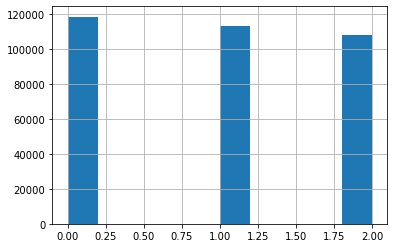

In [3]:
chao_label['late_count_total / INSTALMENT_count'] = pd.DataFrame(chao_label['late_count_total / INSTALMENT_count'].apply(lambda x:2 if x>0.077670 else x))
chao_label['late_count_total / INSTALMENT_count'] = pd.DataFrame(chao_label['late_count_total / INSTALMENT_count'].apply(lambda x:1 if x<0.077670 and x>0 else x))
chao_label['late_count_total / INSTALMENT_count'].hist()

In [6]:
# ref_feature_selection_random_forest
group3_feature = chao_label[['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_EDUCATION_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','FLAG_PHONE', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START_x','OBS_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR','CODE_GENDER_F','NAME_INCOME_TYPE_Working','WEEKDAY_APPR_PROCESS_START_TUESDAY', 'HOUSETYPE_MODE_block of flats']]
group3_feature

,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_PHONE,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START_x,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER_F,NAME_INCOME_TYPE_Working,WEEKDAY_APPR_PROCESS_START_TUESDAY,HOUSETYPE_MODE_block of flats
0,0,202500.0,1,-9461,-637,-3648.0,-2120,1,1.0,10,2.0,-1134.0,0.0,1.0,0,1,0,1
1,0,270000.0,3,-16765,-1188,-1186.0,-291,1,2.0,11,1.0,-828.0,0.0,0.0,1,0,0,1
2,0,67500.0,1,-19046,-225,-4260.0,-2531,1,1.0,9,0.0,-815.0,0.0,0.0,0,1,0,0
3,0,135000.0,1,-19005,-3039,-9833.0,-2437,0,2.0,17,2.0,-617.0,0.0,1.0,1,1,0,0
4,0,121500.0,1,-19932,-3038,-4311.0,-3458,0,1.0,11,0.0,-1106.0,0.0,0.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340360,0,121500.0,1,-19970,-5169,-9094.0,-3399,1,1.0,16,1.0,-684.0,0.0,1.0,1,1,0,0
340361,2,157500.0,1,-11186,-1149,-3015.0,-3003,0,4.0,11,2.0,0.0,0.0,1.0,1,0,0,0
340362,1,202500.0,1,-15922,-3037,-2681.0,-1504,1,3.0,12,0.0,-838.0,3.0,1.0,1,0,0,1
340363,0,225000.0,3,-13968,-2731,-1461.0,-1364,1,2.0,10,0.0,-2308.0,0.0,2.0,0,0,0,1


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

X = group3_feature
y = chao_label[['late_count_total / INSTALMENT_count']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

model = RandomForestClassifier(max_depth=6, n_estimators=10)
model.fit(X_train, y_train)

X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
num_correct_samples = accuracy_score(y_test, y_pred, normalize=False)
con_matrix = confusion_matrix(y_test, y_pred)
f1_score = f1_score(y_test, y_pred, average=None)
cross_val_score = cross_val_score(model,X,y,cv=10,scoring='accuracy')

print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))
print('con_matrix: {}'.format(con_matrix))
print('f1_score: {}'.format(f1_score))
print('cross_val_score: {}',cross_val_score)
print('cross_val_score_mean: {}',cross_val_score.mean())
print('訓練集{}'.format(model.score(X_train, y_train)))
print('測試集{}'.format(model.score(X_test,y_test)))

/var/folders/dp/hcv7h_qn59b6dcz6l8v_w1z80000gn/T/ipykernel_23647/1781309788.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
/Users/hazel/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hazel/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hazel/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A colu

number of correct sample: 29963
accuracy: 0.44015982841949086
con_matrix: [[15364  7259  1214]
 [ 8583 12951  1278]
 [ 9447 10329  1648]]
f1_score: [0.53691181 0.48550168 0.12893131]
cross_val_score: {} [0.43872844 0.43723007 0.43643682 0.44007991 0.43567294 0.43642026
 0.43938771 0.43421671 0.43571513 0.43168998]
cross_val_score_mean: {} 0.4365577971906462
訓練集0.44067765487050664
測試集0.44015982841949086
